# Import Necassary Library

In [199]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

# Input Train Data And Output Data

In [200]:
input_train_data=np.array([[0,1,0],
                  [1,0,1],
                  [1,0,1],
                  [1,20,0],
                  [20,0,1],
                  [1,1,20]])

output_train_data=np.array([[0],[0],[0],[1],[1],[1]])

input_data_prediction=np.array([1,1,0])

In [201]:
input_test_data=np.array([[0,1,0],
                        [1,1,0],
                        [20,1,0],
                        [0,1,1],
                        [20,0,1],
                        [1,0,20]])

output_test_data=np.array([[0],[0],[0],[1],[1],[1]])

In [202]:
scale=MinMaxScaler()
input_scale_train_data=scale.fit_transform(input_train_data)
input_scale_test_data=scale.fit_transform(input_test_data)
output_scale_train_data=scale.fit_transform(output_train_data)
output_scale_test_data=scale.fit_transform(output_test_data)

# Scale Data Max Value

In [203]:
input_scale_train_data.max()

1.0

# Scale Data Min Value

In [204]:
input_scale_train_data.min()

0.0

# Data After Scaling

In [205]:
print("Input Train  Scale Data :",input_scale_train_data)

Input Train  Scale Data : [[0.   0.05 0.  ]
 [0.05 0.   0.05]
 [0.05 0.   0.05]
 [0.05 1.   0.  ]
 [1.   0.   0.05]
 [0.05 0.05 1.  ]]


In [206]:
print("Input Test  Scale Data :",input_scale_test_data)

Input Test  Scale Data : [[0.   1.   0.  ]
 [0.05 1.   0.  ]
 [1.   1.   0.  ]
 [0.   1.   0.05]
 [1.   0.   0.05]
 [0.05 0.   1.  ]]


In [207]:
print("Output Scale Train Data :",output_scale_train_data)

Output Scale Train Data : [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [208]:
print("Output Scale Test Data :",output_scale_test_data)

Output Scale Test Data : [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


# Create Neural Network

In [209]:
class NeuralNetwork():
    def __init__(self):
        
        self.inputsize=3
        self.hiddensize=3
        self.outputsize=1
        
        self.w1=np.random.rand(self.inputsize,self.hiddensize)
        self.w2=np.random.rand(self.hiddensize,self.outputsize)
        self.limit=0.5
        
        self.error_list=[]
        
        self.true_positive=0
        self.true_negative=0
        self.false_positive=0
        self.false_negative=0
    
    def forward(self,x):
        self.z=np.matmul(x,self.w1)
        self.z2=self.sigmoid(self.z)
        self.z3=np.matmul(self.z,self.w2)
        o = self.sigmoid(self.z3)
        return o
        
    def sigmoid(self,s):
        return 1/(1+np.exp(-s))
    
    def sigmoidprime(self,s):
        return s*(1-s)
    
    
    def backward(self,x,y,o):
        self.o_error=y-o
        self.o_delta=self.o_error*self.sigmoidprime(o)
        self.z2_error=np.matmul(self.o_delta,np.matrix.transpose(self.w2))
        self.z2_delta=self.z2_error*self.sigmoidprime(self.z2_error)
        self.w1 +=np.matmul(np.matrix.transpose(x),self.z2_delta)
        self.w2 +=np.matmul(np.matrix.transpose(self.z),self.o_delta)
        
    def train(self,x,y,epochs):
        for epoch in range(epochs):
            o=self.forward(x)
            self.backward(x,y,o)
            self.error_list.append(np.abs(self.o_error).mean())
            
        
        
    def predict(self,test_data):
        return self.forward(test_data).item()
    
    
    
    def visualize_error(self):
        plt.figure(figsize=(10,10))
        plt.plot(range(len(self.error_list)),self.error_list)
        plt.title("Error Visualization",fontsize=15,color="darkorange")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()
    
    def evaluate(self,input_data,output_data):
        
        for i,test_evaluation in enumerate(input_data):
            if self.predict(test_evaluation)>self.limit and output_data[i]==1:
                self.true_positive +=1
                
            if self.predict(test_evaluation)<self.limit and output_data[i]==1:
                self.true_negative +=1
            
            if self.predict(test_evaluation)>self.limit and output_data[i]==0:
                self.false_positive +=1
                
            if self.predict(test_evaluation)<self.limit and output_data[i]==0:
                self.false_negative +=1
        
        
        print("True Positive Values:", self.true_positive)
        print("True negatives Values:", self.true_negative)
        print("False Positive Values:", self.false_positive)
        print("False negatives Values", self.false_negative)
        
        
    
    
    
    
        
        
        
        

        
        

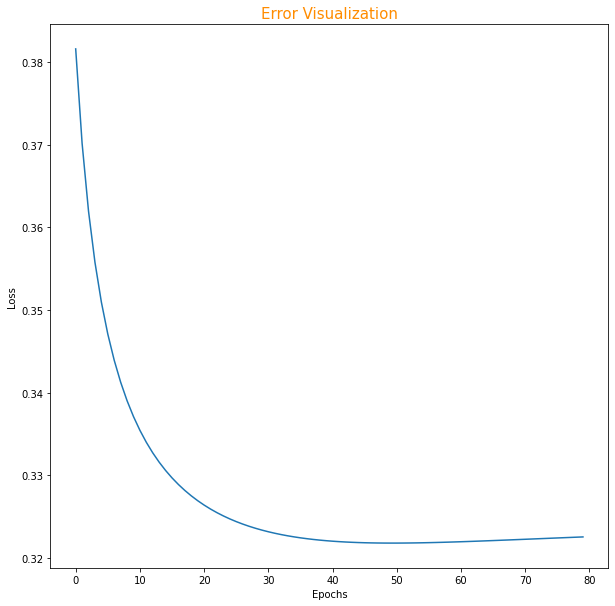

True Positive Values: 3
True negatives Values: 0
False Positive Values: 3
False negatives Values 0


In [210]:
Network = NeuralNetwork()
Network.train(input_scale_train_data, output_scale_train_data, 80)
Network.predict(input_data_prediction)
Network.visualize_error()
Network.evaluate(input_scale_test_data, output_scale_test_data)

#  Create New Model

In [211]:
train_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], 'float32') 
test_data= np.array([[0], [1], [1], [0]], 'float32')

In [212]:
model = Sequential()

model.add(Dense(32, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['binary_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [213]:

model.fit(train_data, test_data, epochs = 10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.2633 - binary_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2627 - binary_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2621 - binary_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2616 - binary_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2610 - binary_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2605 - binary_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2599 - binary_accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 0.2594 - binary_accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2589 - binary_accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss

# Model Evaluate

In [214]:
result = model.evaluate(train_data, test_data)

1/1 [==============================] - 0s 407ms/step - loss: 0.2579 - binary_accuracy: 0.5000


In [215]:
print(result)

[0.25787919759750366, 0.5]


In [216]:
model.predict(train_data.round())

array([[0.50411963],
       [0.44883266],
       [0.509014  ],
       [0.48221108]], dtype=float32)